## Machine Learning - Ex.4

Submitted by: [Osnat Haj Yahia]

In [1]:
%matplotlib inline

import numpy as np
from sklearn.cross_validation import train_test_split 
import matplotlib.pyplot as plt

C:\Users\osnath\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Multi class classification 

In this exercise we will try to learn the DIGITS dataset. 
The dataset contains almost 2000 examples of hand written digits:
$$y_i\in\{0,1,2,...,9\}$$
each sample is represented by a 64 features vector (bitmap of 8x8 pixels):
$$x_i\in R^{64}$$



(1797, 64)
(1797,)


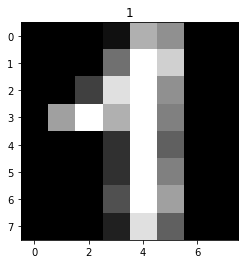

In [2]:
from sklearn import datasets
digits = datasets.load_digits() # load the dataset
X = digits.data
X = X/16
y = digits.target
print(X.shape)
print(y.shape)


i = 47;
plt.imshow(X[i,:].reshape(8,8),interpolation='nearest',cmap='gray')
plt.title(y[i])
plt.show()

### Classify '1' against the rest 

Use logistic regression to learn a classifier for the digit of '1' (y=1). Any other digits, should be classified by this model as '0'.

Learn the model on 80% of the data and test it on the rest of the 20%. 

Count how many training examples and how many testing examples the model identified correctly and wrongly.

Plot a few examples for each case (wrongly vs. correctly).

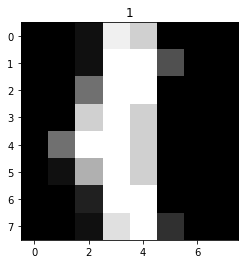

In [11]:
# your code here..
#splitting the data 50/50
x_trn = X[::2] # 0,2,4,6,...
y_trn = y[::2]

x_tst = X[1::2] # 1,3,5,7,...
y_tst = y[1::2]

#print("The digit that i want to predict is :" + y_tst[47])

#class k vs all
def y_preprocess(y_trn, classifie_by):
    y_trn_size = len(y_trn)
    y = np.zeros(y_trn_size)
    for i in range(y_trn_size): 
        if(y_trn[i] ==  classifie_by):
            y[i] = 1
        else:
            y[i] = 0 
    return y

def calc_sigmoid(z):
    sigmoid=1/(1 + np.exp(-z))
    return sigmoid

def calac_cost(x, y, w, N):
    x_trans = x.transpose()
    z = np.dot(w,x_trans)
    y_hat = calc_sigmoid(z)
    j = 1/N * sum(-y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)) 
    return j


def gradient_descent (x, y , alpha ,number_of_iteration):
    j = np.zeros(number_of_iteration) # to hold the cost function value J at each iteration
    N,d = X.shape
    w = np.zeros(d)

    for i in range(number_of_iteration):
        x_trans = x.transpose()
        z= np.dot(w,x_trans)
        y_hat = calc_sigmoid(z)
        w = w - alpha * (np.dot(x_trans,y_hat - y))
        j[i] = calac_cost(x, y, w, N)
    return w,j
    
def predict(x,w):
    x_trans = x.transpose()
    z = np.dot(w,x_trans)
    predection = calc_sigmoid(z)
    return predection


alpha = 0.00001
number_of_iteration = 100000

i = 49;
plt.imshow(x_tst[i,:].reshape(8,8),interpolation='nearest',cmap='gray')
plt.title(y_tst[49])
plt.show()

#class k vs all 
y_1 = y_preprocess(y_trn, classifie_by = 1)
w,j = gradient_descent(x_trn, y_1 , alpha , number_of_iteration) 
f1 = predict(x_tst[47], w)

### Classify '2' against the rest, and so on..


Continue and learn one classifier for each of the digits (0-9). Make sure that your algorithm converged in each one of them.

Now that you have 10 binary classifiers, one for each digit, lets use them as a multi-class classifier. The multi-class classifier will return $y_i\in\{0,1,2,...,9\}$ corresponding to the binary classifier with the highest output.

Summarize your results on the (80%) training data and on the (20%) testing data using a *confusion matrix* $M$.

Where $M_{i,j}$ counts how many examples with true label $y=i$ were classified as $j$.

see also: <https://en.wikipedia.org/wiki/Confusion_matrix>

In [12]:
y_2 = y_preprocess(y_trn, classifie_by = 2)
w2,j2 = gradient_descent(x_trn, y_2 , alpha , number_of_iteration)
f2 = predict(x_tst[49],w2)


y_3 = y_preprocess(y_trn, classifie_by = 3)
w3,j3 = gradient_descent(x_trn, y_3 , alpha , number_of_iteration)
f3 = predict(x_tst[49],w3)


y_4 = y_preprocess(y_trn, classifie_by = 4)
w4,j4 = gradient_descent(x_trn, y_4 , alpha , number_of_iteration)
f4 = predict(x_tst[49],w4)



y_5 = y_preprocess(y_trn, classifie_by = 5)
w5,j5 = gradient_descent(x_trn, y_5 , alpha , number_of_iteration)
f5 = predict(x_tst[49],w5)



y_6 = y_preprocess(y_trn, classifie_by = 6)
w6,j6 = gradient_descent(x_trn, y_6 , alpha , number_of_iteration)
f6 = predict(x_tst[49],w6)



y_7 = y_preprocess(y_trn, classifie_by = 7)
w7,j7 = gradient_descent(x_trn, y_7 , alpha , number_of_iteration)
f7 = predict(x_tst[49],w7)



y_8 = y_preprocess(y_trn, classifie_by = 8)
w8,j8 = gradient_descent(x_trn, y_8 , alpha , number_of_iteration)
f8 = predict(x_tst[49],w8)



y_9 = y_preprocess(y_trn, classifie_by = 9)
w9,j9 = gradient_descent(x_trn, y_9 , alpha , number_of_iteration)
f9 = predict(x_tst[49],w9)



y_0 = y_preprocess(y_trn, classifie_by = 0)
w0,j0 = gradient_descent(x_trn, y_0 , alpha , number_of_iteration)
f0 = predict(x_tst[49],w0)


result = max(f1 ,f2 ,f3 ,f4, f5, f6, f7, f8, f9, f0)

print('classifier for y = 0 :' , f0)
print('classifier for y = 1 :' , f1)
print('classifier for y = 2 :' , f2)
print('classifier for y = 3 :' , f3)
print('classifier for y = 4 :' , f4)
print('classifier for y = 5 :' , f5)
print('classifier for y = 6 :' , f6)
print('classifier for y = 7 :' , f7)
print('classifier for y = 8 :' , f8)
print('classifier for y = 9 :' , f9)

print(result)

classifier for y = 0 : 2.62696203641e-06
classifier for y = 1 : 0.784772975457
classifier for y = 2 : 0.000207638292075
classifier for y = 3 : 1.88137520317e-05
classifier for y = 4 : 0.142559107637
classifier for y = 5 : 0.000273285617189
classifier for y = 6 : 0.00294090226258
classifier for y = 7 : 0.000154798477603
classifier for y = 8 : 0.00220952365523
classifier for y = 9 : 1.07425457443e-05
0.784772975457


## Good luck !